57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
Training with dropout rate: 0.2


d:\DP Larning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with dropout rate: 0.5
Training with dropout rate: 0.9


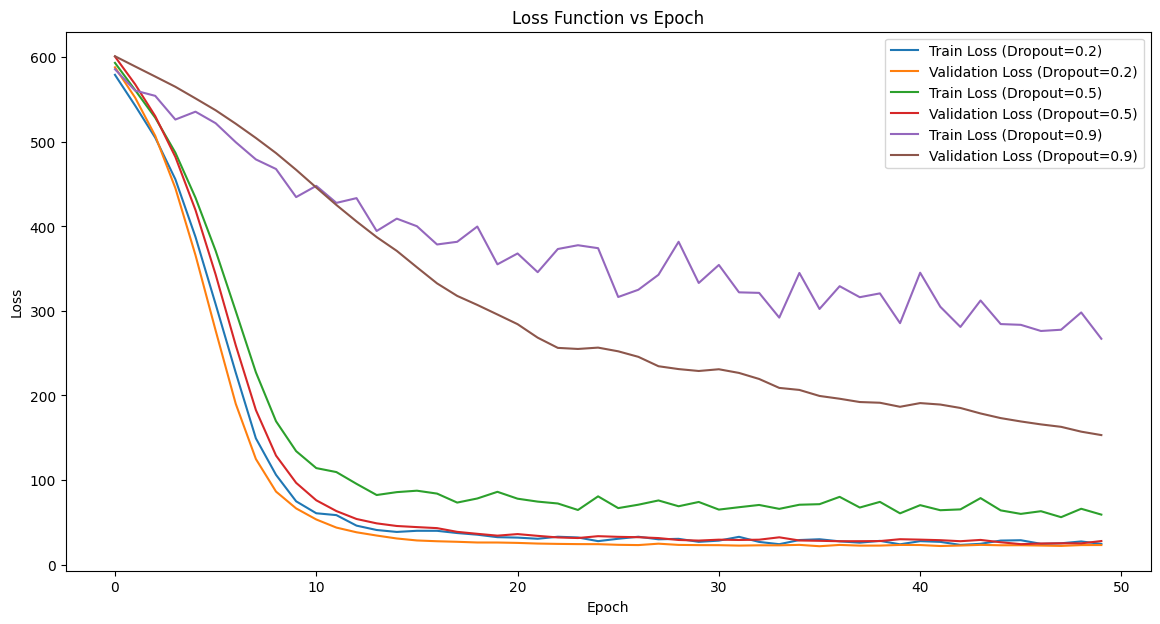

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Load dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalize the data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

def build_model(dropout_rate):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

dropout_rates = [0.2, 0.5,0.9]
history_dict = {}

# Train models with different dropout rates
for rate in dropout_rates:
    print(f"Training with dropout rate: {rate}")
    model = build_model(rate)
    history = History()
    history_dict[rate] = history
    model.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), verbose=0, callbacks=[history])

# Plot training and validation loss
plt.figure(figsize=(14, 7))

for rate, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss (Dropout={rate})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Dropout={rate})')

plt.title('Loss Function vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
num_samples = 1000
input_dim = 10
output_dim1 = 1
output_dim2 = 1

# Features
X = np.random.rand(num_samples, input_dim)

# Targets with two different outputs
y1 = X[:, 0] * 0.5 + np.random.rand(num_samples) * 0.1
y2 = X[:, 1] * 0.7 + np.random.rand(num_samples) * 0.1

# Split the data
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=0
)

# ------------------ MODEL ------------------ #

inputs = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# Two output layers
output1 = Dense(output_dim1, name='output1')(x)
output2 = Dense(output_dim2, name='output2')(x)

model = Model(inputs=inputs, outputs=[output1, output2])

# Compile
model.compile(
    optimizer='adam',
    loss={'output1': 'mse', 'output2': 'mse'},
    metrics={'output1': 'mae', 'output2': 'mae'}
)

# Train
history = model.fit(
    X_train,
    {'output1': y1_train, 'output2': y2_train},
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ------------------ EVALUATION ------------------ #

results = model.evaluate(
    X_test,
    {'output1': y1_test, 'output2': y2_test},
    verbose=0
)

print("\nModel Metrics Order:", model.metrics_names)

total_loss = results[0]
output1_loss = results[1]
output2_loss = results[2]
output1_mae = results[3]
output2_mae = results[4]

print(f"\nTotal Loss: {total_loss:.4f}")
print(f"Output1 Loss: {output1_loss:.4f}")
print(f"Output2 Loss: {output2_loss:.4f}")
print(f"Output1 MAE: {output1_mae:.4f}")
print(f"Output2 MAE: {output2_mae:.4f}")

# ------------------ SUMMARY ------------------ #
model.summary()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0643 - output1_loss: 0.0201 - output1_mae: 0.1152 - output2_loss: 0.0442 - output2_mae: 0.1649 - val_loss: 0.0437 - val_output1_loss: 0.0153 - val_output1_mae: 0.0989 - val_output2_loss: 0.0284 - val_output2_mae: 0.1373
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - output1_loss: 0.0101 - output1_mae: 0.0809 - output2_loss: 0.0148 - output2_mae: 0.0957 - val_loss: 0.0203 - val_output1_loss: 0.0084 - val_output1_mae: 0.0736 - val_output2_loss: 0.0120 - val_output2_mae: 0.0882
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - output1_loss: 0.0055 - output1_mae: 0.0596 - output2_loss: 0.0058 - output2_mae: 0.0586 - val_loss: 0.0097 - val_output1_loss: 0.0047 - val_output1_mae: 0.0558 - val_output2_loss: 0.0050 - val_output2_mae: 0.0566
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - output1_loss: 0.0032 - output1_mae: 0.0450 - output2_loss: 0.0030 - output2_mae: 0.0435 - va

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │        704 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │      2,080 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 1)         │         33 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 1)         │         33 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,552 (33.41 KB)

 Trainable params: 2,850 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,702 (22.28 KB)